<a href="https://colab.research.google.com/github/lygitdata/GarmentIQ/blob/main/python_api_demo/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import `garmentiq`, install dependencies, and download test images

In [ ]:
import sys

!git clone https://github.com/lygitdata/GarmentIQ.git
!pip install -r /content/GarmentIQ/src/requirements.txt -q

sys.path.insert(0, './GarmentIQ/src')

Cloning into 'GarmentIQ'...
remote: Enumerating objects: 1082, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 1082 (delta 64), reused 4 (delta 0), pack-reused 953 (from 4)
Receiving objects: 100% (1082/1082), 187.29 MiB | 18.99 MiB/s, done.
Resolving deltas: 100% (517/517), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
import garmentiq as giq

In [ ]:
!mkdir -p /content/test_images

!wget -q -O /content/test_images/cloth_1.jpg https://garmentiq.ly.gd.edu.kg/asset/img/cloth_1.jpg
!wget -q -O /content/test_images/cloth_2.jpg https://garmentiq.ly.gd.edu.kg/asset/img/cloth_2.jpg
!wget -q -O /content/test_images/cloth_3.jpg https://garmentiq.ly.gd.edu.kg/asset/img/cloth_3.jpg
!wget -q -O /content/test_images/cloth_4.jpg https://garmentiq.ly.gd.edu.kg/asset/img/cloth_4.jpg

# Function `load_model`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/load_model.py

In [ ]:
BiRefNet = giq.segmentation.load_model(
    pretrained_model='ZhengPeng7/BiRefNet',
    pretrained_model_args={'trust_remote_code': True},
    high_precision=False
)

config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

BiRefNet_config.py:   0%|          | 0.00/298 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- BiRefNet_config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


birefnet.py:   0%|          | 0.00/92.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- birefnet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


model.safetensors:   0%|          | 0.00/444M [00:00<?, ?B/s]

# Function `extract`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/extract.py

In [ ]:
original_img, mask = giq.segmentation.extract(
    model=BiRefNet,
    image_path='/content/test_images/cloth_1.jpg',
    resize_dim=(1024, 1024),
    normalize_mean=[0.485, 0.456, 0.406],
    normalize_std=[0.229, 0.224, 0.225],
    high_precision=False
)

In [ ]:
print(original_img.shape)
print(mask.shape)

(2400, 1800, 3)
(2400, 1800)


# Function `plot`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/plot.py

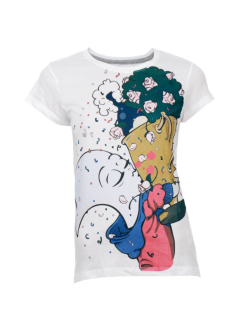

In [ ]:
giq.segmentation.plot(image_np=original_img, figsize=(3, 3))

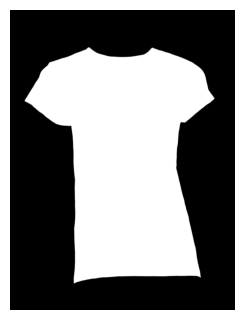

In [ ]:
giq.segmentation.plot(image_np=mask, figsize=(3, 3))

# Function `change_background_color`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/change_background_color.py

In [ ]:
bg_modified_img = giq.segmentation.change_background_color(
    image_np=original_img,
    mask_np=mask,
    background_color=[102, 255, 102]
)

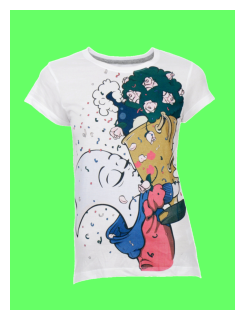

In [ ]:
giq.segmentation.plot(image_np=bg_modified_img, figsize=(3, 3))

# Function `process_and_save_images`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/process_and_save_images.py

## Mask only

You can also check out the folder `/content/output_mask_only` to see the processed images.

In [ ]:
giq.segmentation.process_and_save_images(
    image_dir="/content/test_images",
    output_dir="/content/output_mask_only",
    model=BiRefNet,
    resize_dim=(1024, 1024),
    normalize_mean=[0.485, 0.456, 0.406],
    normalize_std=[0.229, 0.224, 0.225],
    high_precision=False
)

Processing Images: 100%|██████████| 4/4 [00:02<00:00,  1.92image/s]


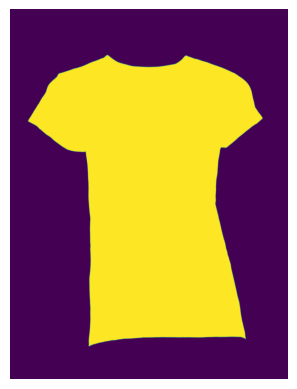

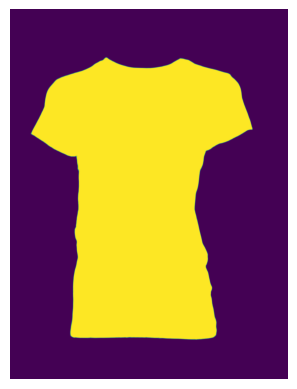

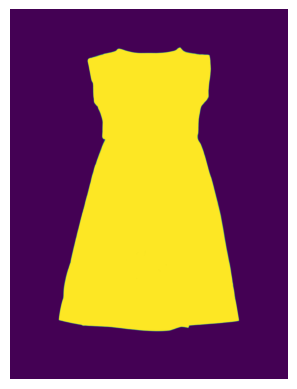

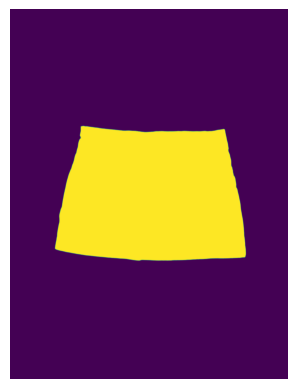

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# See masks
for i in range(1, 5):
  img = mpimg.imread(f"/content/output_mask_only/masks/mask_cloth_{i}.jpg")
  plt.imshow(img)
  plt.axis('off')
  plt.show()

## Mask and background modification

You can also check out the folder `/content/output_all` to see the processed images.

In [ ]:
giq.segmentation.process_and_save_images(
    image_dir="/content/test_images",
    output_dir="/content/output_all",
    model=BiRefNet,
    resize_dim=(1024, 1024),
    normalize_mean=[0.485, 0.456, 0.406],
    normalize_std=[0.229, 0.224, 0.225],
    background_color=[102, 255, 102],
    high_precision=False
)

Processing Images: 100%|██████████| 4/4 [00:02<00:00,  1.39image/s]


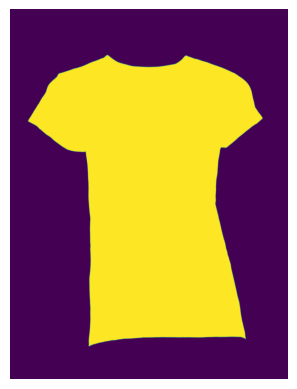

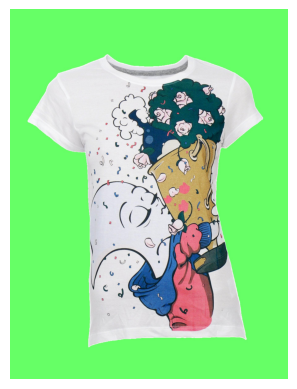

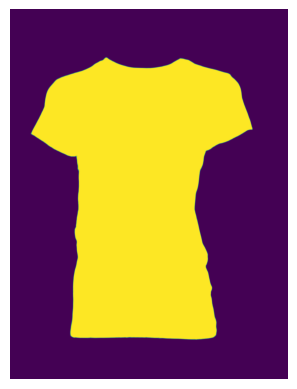

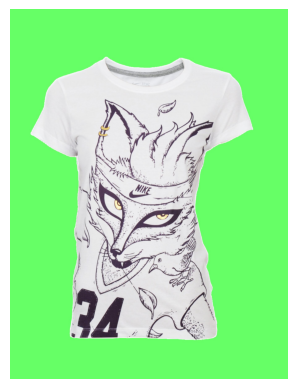

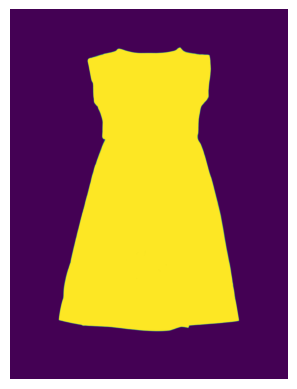

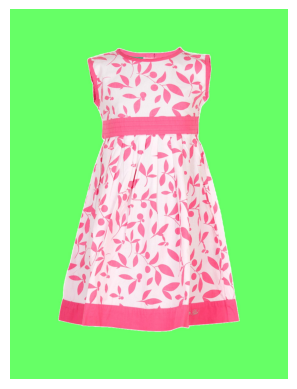

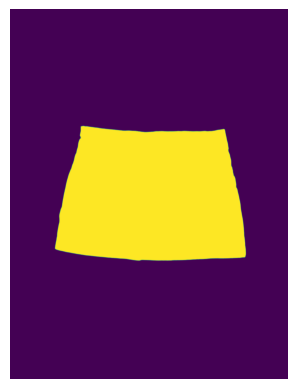

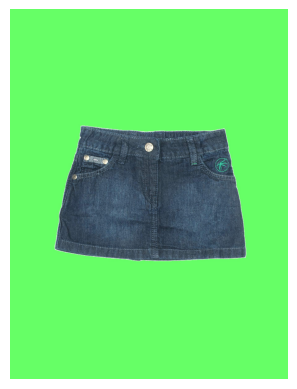

In [ ]:
for i in range(1, 5):
  mask = mpimg.imread(f"/content/output_all/masks/mask_cloth_{i}.jpg")
  plt.imshow(mask)
  plt.axis('off')
  plt.show()

  bg_modified = mpimg.imread(f"/content/output_all/bg_modified/bg_modified_cloth_{i}.jpg")
  plt.imshow(bg_modified)
  plt.axis('off')
  plt.show()